In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#text_processing
import re

pd.set_option("display.max_columns", None)


In [7]:
Data_path="../data/raw/complaints.csv"

# Load the dataset
df = pd.read_csv(Data_path)
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

C:\Users\betteyk\AppData\Local\Temp\ipykernel_9212\2085388307.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Data_path)


Dataset loaded successfully!
Shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [9]:
# Normalize column names 
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("?", "", regex=False)
)

df.columns


Index(['date_received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [10]:
# Replace hyphens with underscores in column names
df.columns = df.columns.str.replace("-", "_")

df.columns


Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [11]:
# Remove rows with empty complaint narratives
df = df.dropna(subset=["consumer_complaint_narrative"])

print("Shape after removing empty narratives:", df.shape)


Shape after removing empty narratives: (2980756, 18)


In [12]:
# Target products for this project
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

# Filter dataset
df = df[df["product"].isin(target_products)]

print("Shape after product filtering:", df.shape)

# Check distribution by product
df["product"].value_counts()


Shape after product filtering: (80667, 18)


product
Credit card    80667
Name: count, dtype: int64

In [13]:
df["product"].value_counts().head(20)


product
Credit card    80667
Name: count, dtype: int64

In [14]:
# Create word count column
df["word_count"] = (
    df["consumer_complaint_narrative"]
    .astype(str)
    .apply(lambda x: len(x.split()))
)

df["word_count"].describe()


count    80667.000000
mean       199.791674
std        223.183087
min          2.000000
25%         63.000000
50%        141.000000
75%        260.000000
max       6469.000000
Name: word_count, dtype: float64

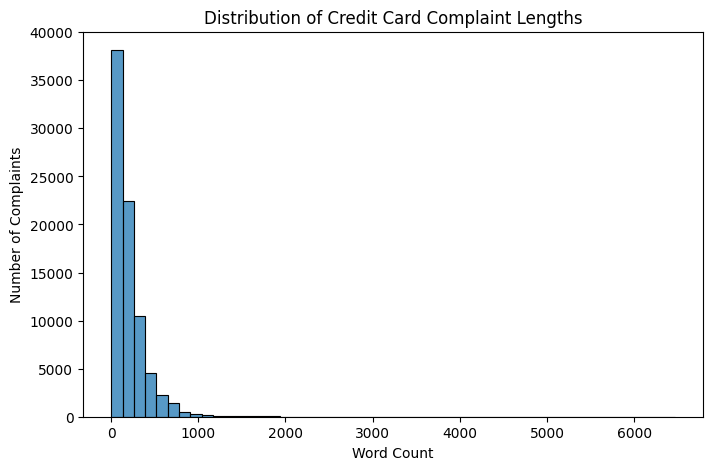

In [15]:

plt.figure(figsize=(8, 5))
sns.histplot(df["word_count"], bins=50)
plt.title("Distribution of Credit Card Complaint Lengths")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.show()


In [16]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)      # remove special characters
    text = re.sub(r"\s+", " ", text)           # remove extra spaces
    return text.strip()


In [17]:
df["cleaned_narrative"] = df["consumer_complaint_narrative"].apply(clean_text)

df[["consumer_complaint_narrative", "cleaned_narrative"]].head(2)


,consumer_complaint_narrative,cleaned_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...


In [18]:
output_path = "../data/processed/filtered_complaints.csv"
df.to_csv(output_path, index=False)

print("Saved cleaned data to:", output_path)
print("Final dataset shape:", df.shape)


Saved cleaned data to: ../data/processed/filtered_complaints.csv
Final dataset shape: (80667, 20)
